In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('titanic.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

# 1

Text(0.5, 1.0, 'Correlation Heatmap Between Numerical Features')

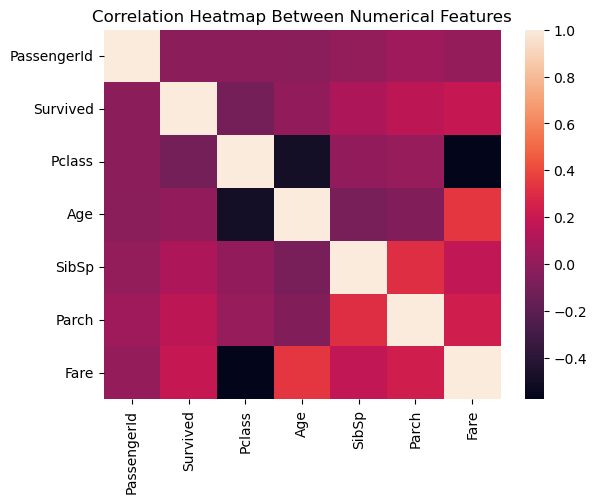

In [19]:
sns.heatmap(df.corr(numeric_only=True))
plt.title("Correlation Heatmap Between Numerical Features")

Observation:

1.Fare and Pclass show a strong negative correlation (higher class → higher fare).
2.Survived is positively correlated with Fare and negatively with Pclass, suggesting higher class passengers were more likely to survive.

# 2

Text(0.5, 1.0, 'Age Distribution of Passengers')

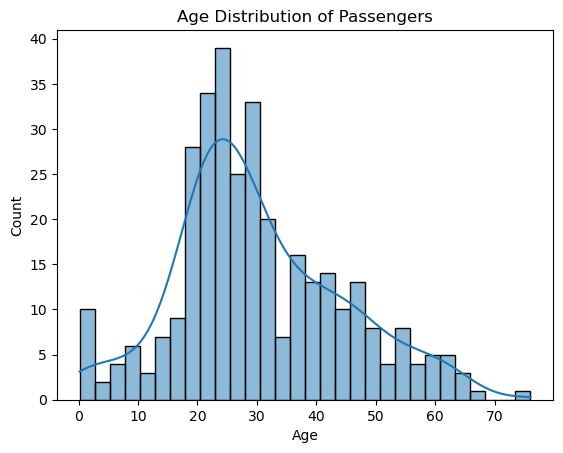

In [21]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Passengers")

Observation:

1.Most passengers were between 20–40 years old.
2.A noticeable drop in passengers aged above 60.
3.Distribution is slightly right-skewed.

# 3

Text(0.5, 1.0, 'Survival Count by Gender')

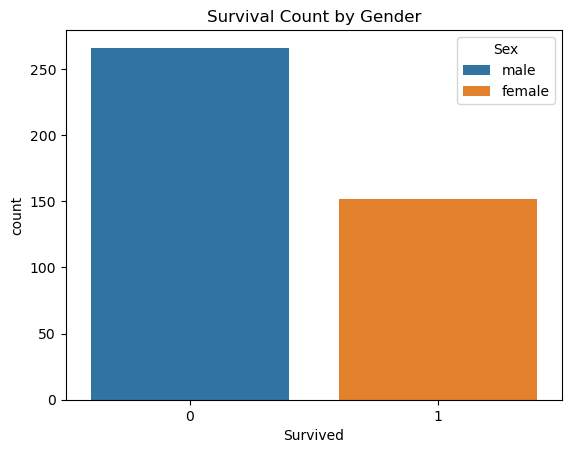

In [23]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Gender")

Observation:

1.Males had a significantly higher survival rate than females.
2.Most non-survivors were male, indicating gender bias in survival priority (e.g., “women and children first”).

# 4

Text(0.5, 1.0, 'Age Distribution Across Passenger Classes')

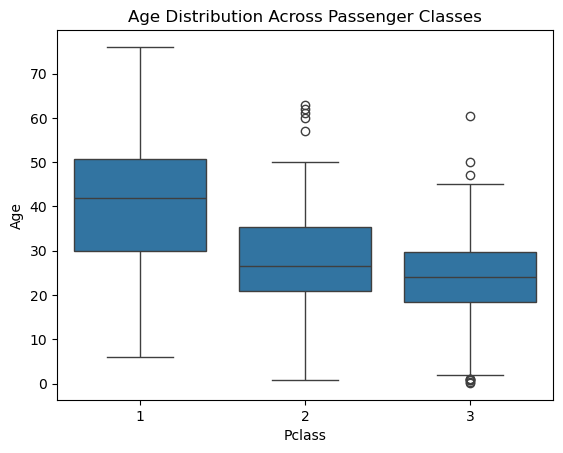

In [24]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age Distribution Across Passenger Classes")

Observation:

1.1st class passengers are generally older than those in 2nd or 3rd class.
2.3rd class has more young passengers and children.

# 5

Text(0.5, 1.0, 'Fare vs Age Colored by Survival Status')

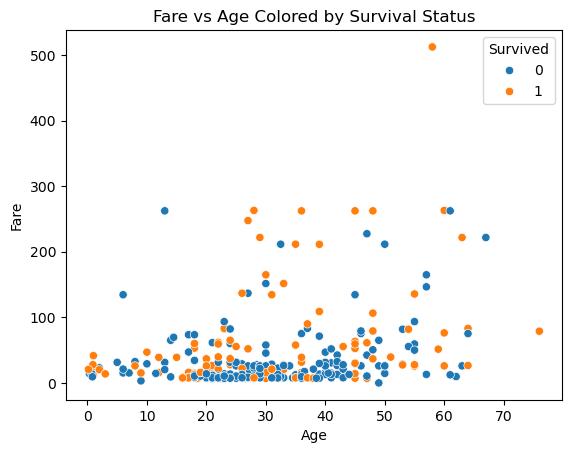

In [25]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Fare vs Age Colored by Survival Status")

Observation:

1.Survivors are more concentrated in higher fare regions, especially in the 20–50 age group.
2.Several passengers paid low fares and did not survive, likely from lower classes.

# 6

Text(0.5, 1.0, 'Count of Passengers by Class')

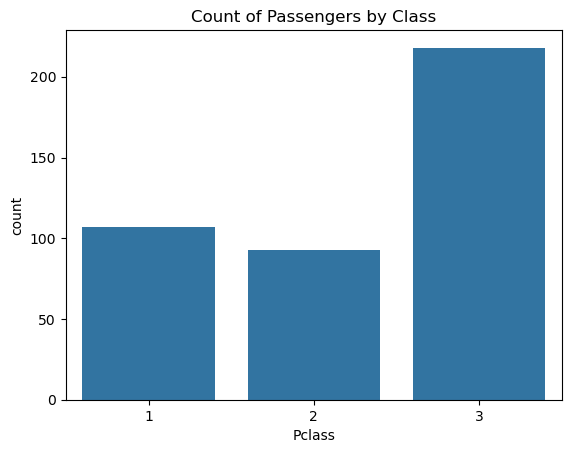

In [26]:
sns.countplot(x='Pclass', data=df)
plt.title("Count of Passengers by Class")

Observation:

1.Most passengers were in 3rd class, followed by 1st and 2nd.
2.Imbalance suggests the ship carried more economically accessible travelers.

# 7

Text(0.5, 1.02, 'Pairplot of Pclass, Age, and Fare Colored by Survival')

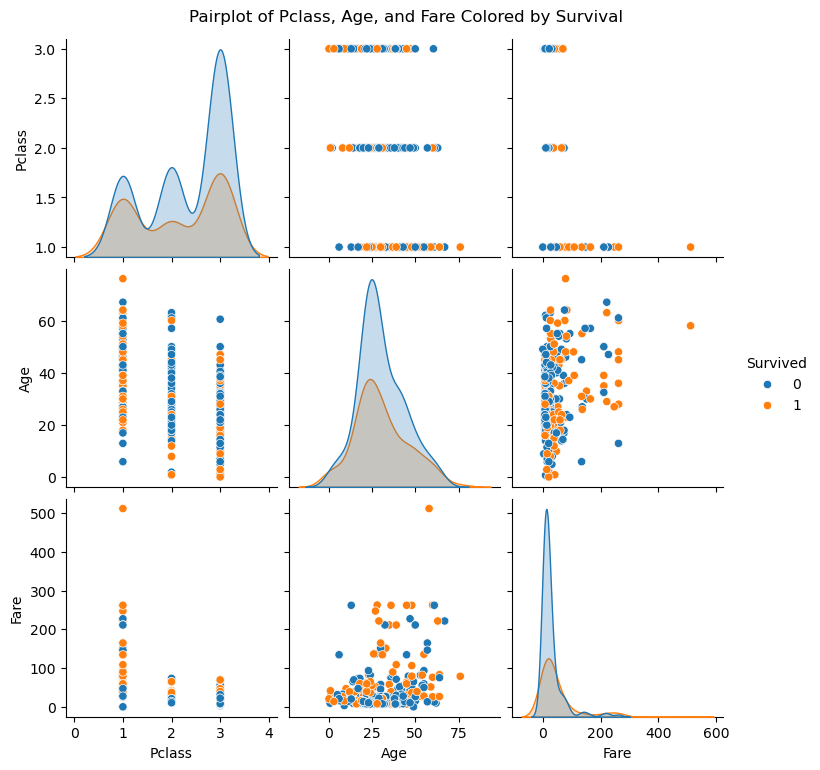

In [33]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.suptitle("Pairplot of Pclass, Age, and Fare Colored by Survival", y=1.02)

Observation:

1.Clear clusters show 1st class passengers with high fares had higher survival.
2.Most 3rd class passengers (low fare) did not survive.

# 8

Text(0.5, 1.0, 'Fare Distribution Across Passenger Classes')

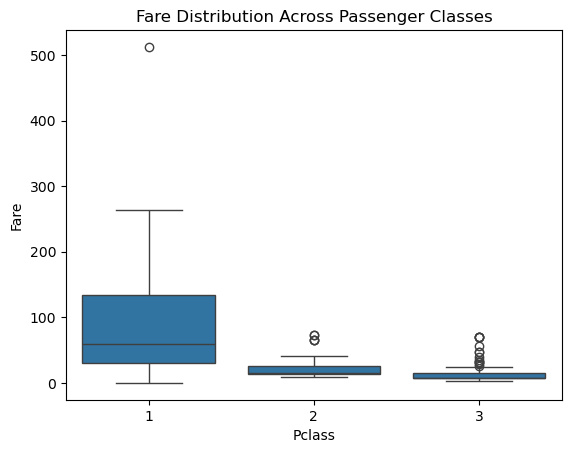

In [29]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution Across Passenger Classes")

Observation:

1.Median fare for 1st class is significantly higher than 2nd and 3rd.
2.Fare distribution in 3rd class is very compressed with a few outliers.

# 9

Text(0.5, 1.0, 'Survival Count by Age Group')

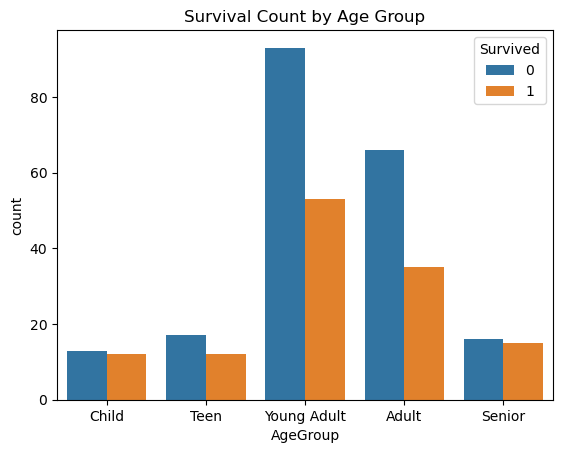

In [30]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,30,50,80], labels=['Child','Teen','Young Adult','Adult','Senior'])
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title("Survival Count by Age Group")

Observation:

1.Children and young adults had better survival rates.
2.Seniors had the lowest survival rate, suggesting age was a disadvantage in survival chances.

# 10

Text(0.5, 1.0, 'Survival Distribution by Embarkation Port')

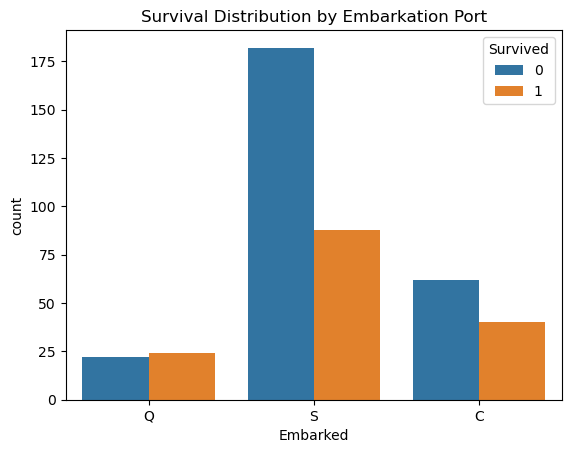

In [35]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival Distribution by Embarkation Port")

Observation:

Passengers who boarded from Cherbourg (C) had a higher survival rate.
Most deaths occurred among passengers from Southampton (S), likely due to a higher proportion of 3rd class passengers.